In [1]:
# %load ../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# To model the Gaussian Navie Bayes classifier
from sklearn.naive_bayes import GaussianNB

import sklearn.linear_model as skl_lm
from sklearn.svm import SVC, LinearSVC

from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn import preprocessing
from sklearn import neighbors

# To calculate the accuracy score of the model
from sklearn.metrics import accuracy_score


/usr/local/anaconda/python3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df = pd.read_csv('../islr/Caravan.csv')
y = df.Purchase
X = df.drop('Purchase', axis=1).astype('float64')
X_scaled = preprocessing.scale(X)

In [3]:
# Random train and test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=0.7, random_state=2)

In [4]:
####  K-nearest neighbors

In [5]:
def KNN(n_neighbors=1, weights='uniform'):
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights)
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    score = clf.score(X_test, y_test)
    accuracyScore = accuracy_score(y_test, pred, normalize = True)
    return(pred, score, clf.classes_, accuracyScore)

In [6]:
def plot_confusion_matrix(cm, classes, n_neighbors, title='Confusion matrix (Normalized)', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Normalized confusion matrix: KNN-{}'.format(n_neighbors))
    plt.colorbar()
    plt.xticks(np.arange(2), classes)
    plt.yticks(np.arange(2), classes)
    plt.tight_layout()
    plt.xlabel('True label',rotation='horizontal', ha='right')
    plt.ylabel('Predicted label')
    plt.show()

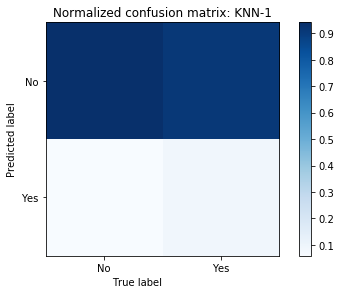

True         No  Yes
Predicted           
No         1548   93
Yes          97    9
     Precision
No    0.943327
Yes   0.084906
Accuracy score
0.891242129365


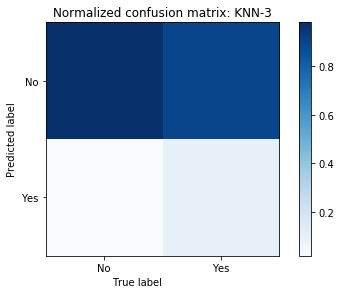

True         No  Yes
Predicted           
No         1614   92
Yes          31   10
     Precision
No    0.946073
Yes   0.243902
Accuracy score
0.92959358901


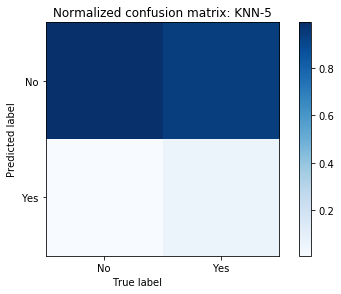

True         No  Yes
Predicted           
No         1631   96
Yes          14    6
     Precision
No    0.944412
Yes   0.300000
Accuracy score
0.937034917001


In [7]:
for i in [1,3,5]:
    pred, score, classes, accuracyScore = KNN(i)
    cm = confusion_matrix(y_test, pred)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plot_confusion_matrix(cm_normalized.T, classes, n_neighbors=i)
    cm_df = pd.DataFrame(cm.T, index=classes, columns=classes)
    cm_df.index.name = 'Predicted'
    cm_df.columns.name = 'True'
    print(cm_df)    
    print(pd.DataFrame(precision_score(y_test, pred, average=None), index=classes, columns=['Precision']))    
    print("Accuracy score")
    print(accuracyScore)

In [8]:
####  Logistic Regression

In [9]:
regr = skl_lm.LogisticRegression()
regr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [10]:
pred = regr.predict(X_test)
cm_df = pd.DataFrame(confusion_matrix(y_test, pred).T, index=regr.classes_,
                     columns=regr.classes_)
cm_df.index.name = 'Predicted'
cm_df.columns.name = 'True'
print(cm_df)
print(classification_report(y_test, pred))

True         No  Yes
Predicted           
No         1635  100
Yes          10    2
             precision    recall  f1-score   support

         No       0.94      0.99      0.97      1645
        Yes       0.17      0.02      0.04       102

avg / total       0.90      0.94      0.91      1747



In [11]:
pred_p = regr.predict_proba(X_test)
cm_df = pd.DataFrame({'True': y_test, 'Pred': pred_p[:,1] > .25})
cm_df.Pred.replace(to_replace={True:'Yes', False:'No'}, inplace=True)
print(cm_df.groupby(['True', 'Pred']).size().unstack('True').T)
print(classification_report(y_test, cm_df.Pred))

Pred    No  Yes
True           
No    1602   43
Yes     87   15
             precision    recall  f1-score   support

         No       0.95      0.97      0.96      1645
        Yes       0.26      0.15      0.19       102

avg / total       0.91      0.93      0.92      1747



In [12]:
# Accuracy score
accuracy_score(y_test, pred, normalize = True)

0.9370349170005724

In [13]:
####  Support Vector Machines

In [14]:
svm = SVC(C=1.0, kernel='rbf', gamma=1)
svm.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [15]:
pred = svm.predict(X_test)
cm_df = pd.DataFrame(confusion_matrix(y_test, pred).T)
cm_df.index.name = 'Predicted'
cm_df.columns.name = 'True'
print(cm_df)
print(classification_report(y_test, pred))

True          0    1
Predicted           
0          1642  102
1             3    0
             precision    recall  f1-score   support

         No       0.94      1.00      0.97      1645
        Yes       0.00      0.00      0.00       102

avg / total       0.89      0.94      0.91      1747



In [16]:
# Accuracy score
accuracy_score(y_test, pred, normalize = True)

0.93989696622781915

In [17]:
####  Naive Bayes

In [18]:
clf = GaussianNB()
clf.fit(X_train, y_train)

GaussianNB(priors=None)

In [19]:
pred = clf.predict(X_test)
cm_df = pd.DataFrame(confusion_matrix(y_test, pred).T)
cm_df.index.name = 'Predicted'
cm_df.columns.name = 'True'
print(cm_df)
print(classification_report(y_test, pred))

True          0    1
Predicted           
0           180    2
1          1465  100
             precision    recall  f1-score   support

         No       0.99      0.11      0.20      1645
        Yes       0.06      0.98      0.12       102

avg / total       0.93      0.16      0.19      1747



In [20]:
# Accuracy score
accuracy_score(y_test, pred, normalize = True)

0.16027475672581568